In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
#Load the dataset

file_path = '/content/drive/MyDrive/E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(file_path)
print(df.head())
print("\nShape: ",df.shape)

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

Data Info, data describe and data columns

In [58]:
print("Data Info:")
print(df.info())

print("\nData Describe:")
print(df.describe())

print("\nData Columns:")
print(df.columns)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None

Data Describe:
       Customer ID         Age  Total Spend  Items Purchased  Average Rating

EXPLORATORY DATA ANALYSIS

In [59]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [60]:
#Understanding Numerical and Categorical Data
print("\nStatistical Summary (Numerical Features):")
print(df.describe())

print("\nStatistical Summary (Categorical Features):")
print(df.describe(include='object'))



Statistical Summary (Numerical Features):
       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000 

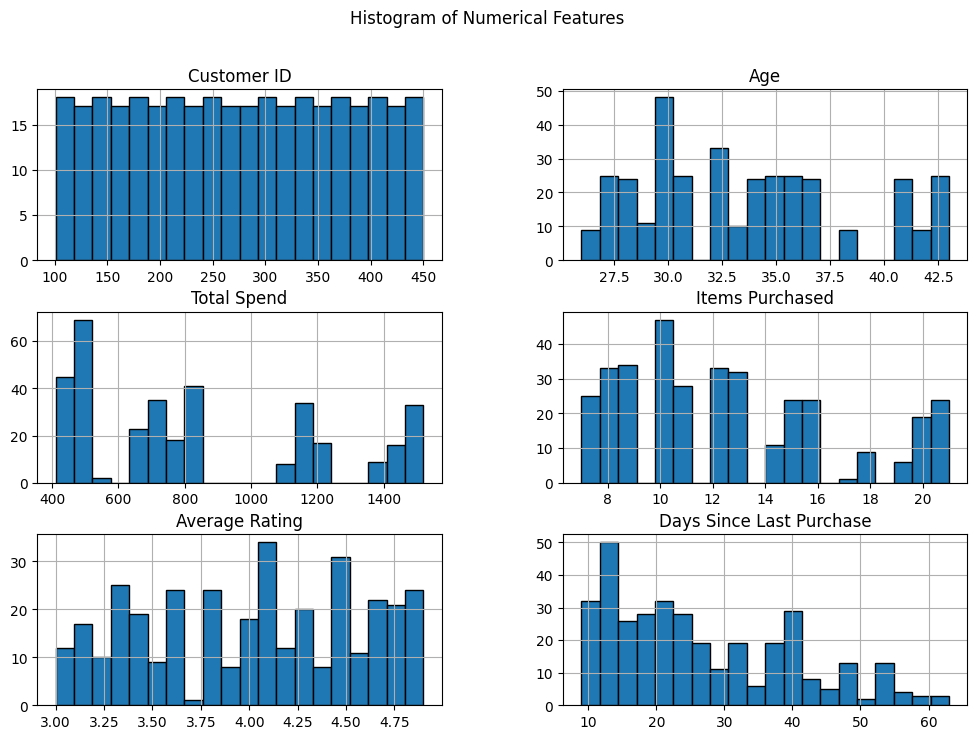

In [37]:
#Histogram for Numerical Features

df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.show()


<ipython-input-38-009a8eca755b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


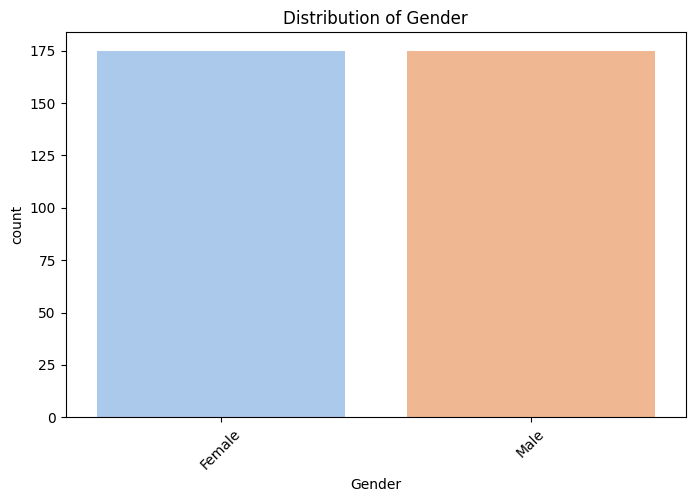

<ipython-input-38-009a8eca755b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


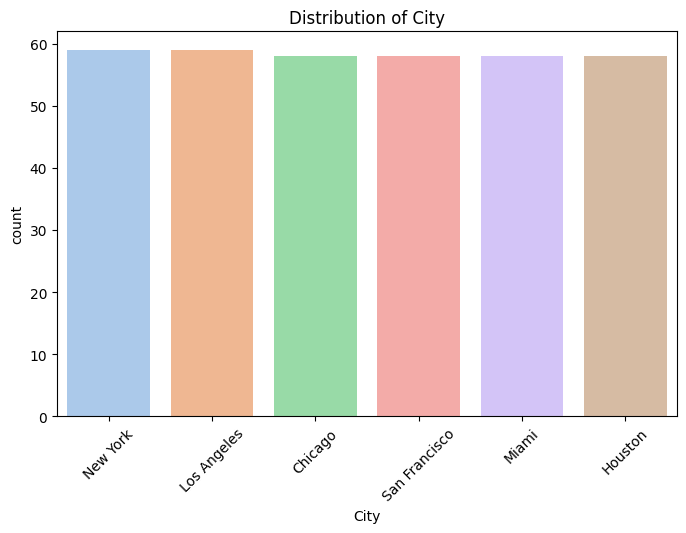

<ipython-input-38-009a8eca755b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


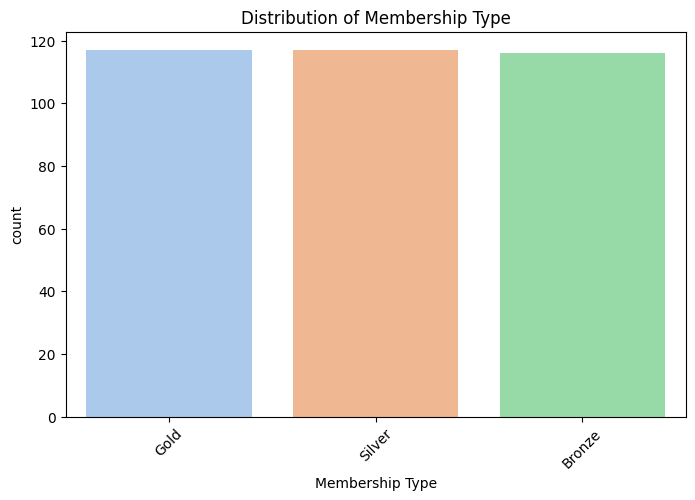

<ipython-input-38-009a8eca755b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


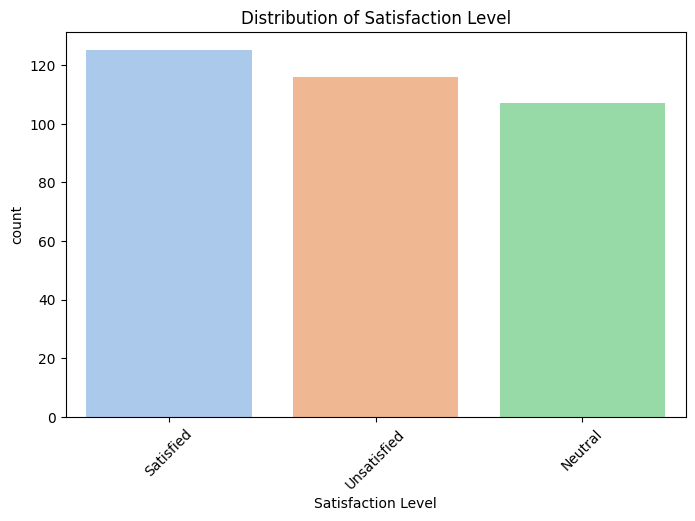

In [38]:
#Categorical Feature Distribution

for col in ['Gender', 'City', 'Membership Type', 'Satisfaction Level']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-39-e8f49758d394>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Membership Type', y='Total Spend', palette='coolwarm')


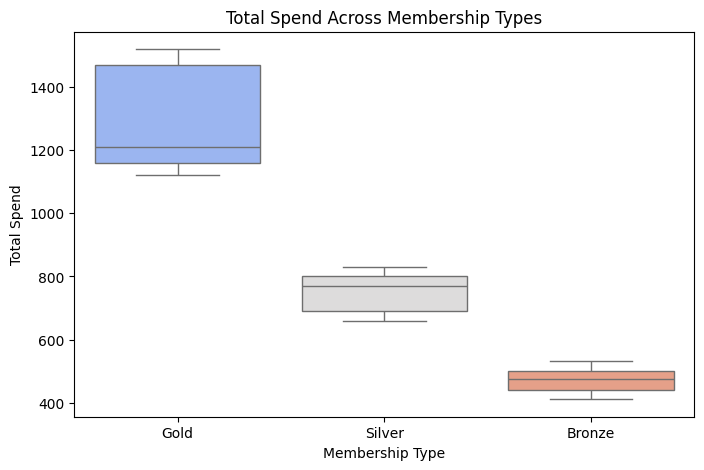

In [39]:
#Boxplot for Spending Across Membership Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Membership Type', y='Total Spend', palette='coolwarm')
plt.title("Total Spend Across Membership Types")
plt.show()


<ipython-input-40-513c3db74718>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Satisfaction Level', y='Total Spend', palette='viridis')


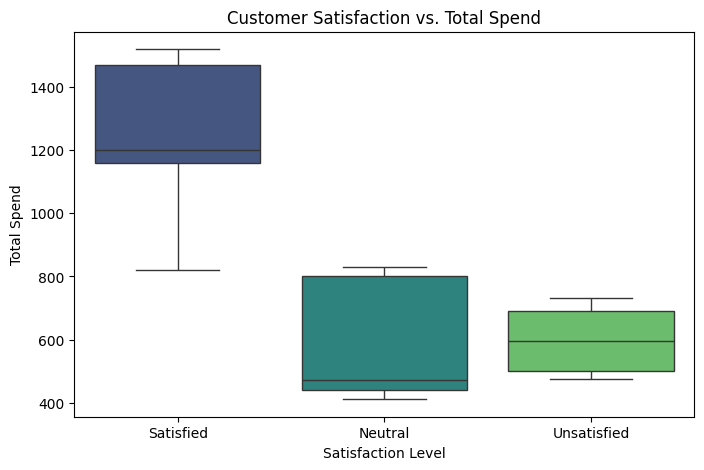

In [40]:
#Customer Satisfaction vs. Total Spend- BOX PLOT

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Satisfaction Level', y='Total Spend', palette='viridis')
plt.title("Customer Satisfaction vs. Total Spend")
plt.show()


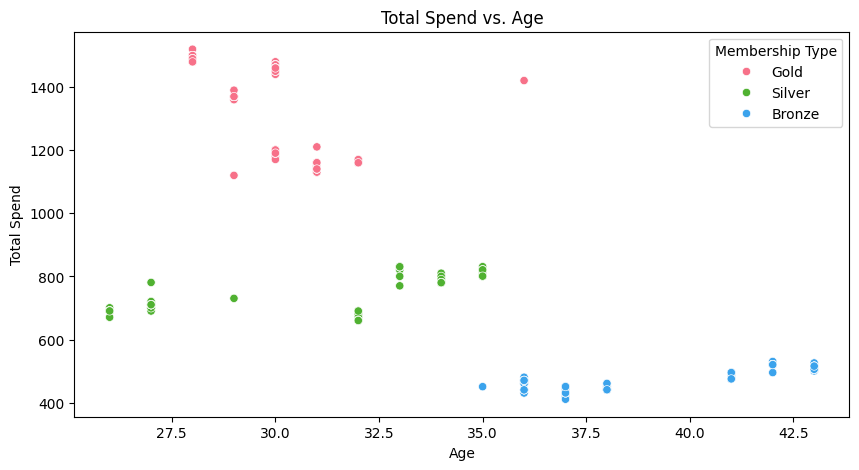

In [ ]:
#Spending Trends by Age - SCATTER PLOT
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Total Spend', hue='Membership Type', palette='husl')
plt.title("Total Spend vs. Age")
plt.show()


<ipython-input-11-7bef32ba6e8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Discount Applied', y='Total Spend', palette='coolwarm')


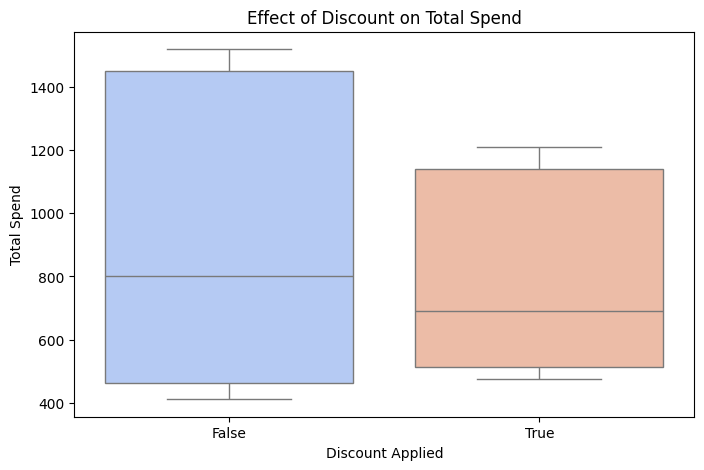

In [ ]:
#Impact of Discounts on Total Spend- BOX PLOT
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Discount Applied', y='Total Spend', palette='coolwarm')
plt.title("Effect of Discount on Total Spend")
plt.show()


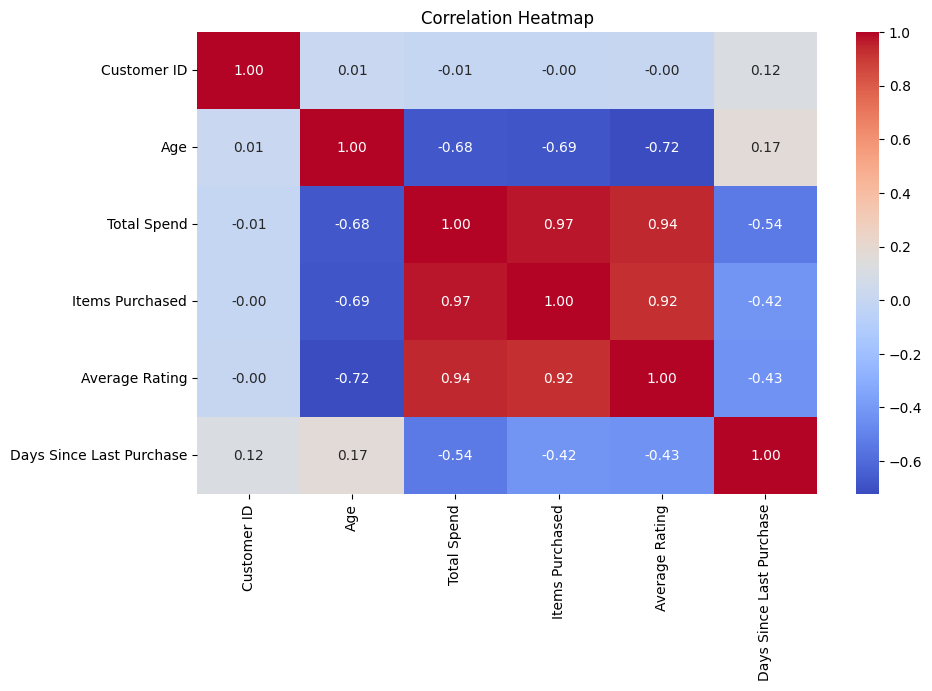

In [ ]:
#Correlation Heatmap for Numerical Features

numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-41-a972125fdb1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Satisfaction Level', palette='Set2')


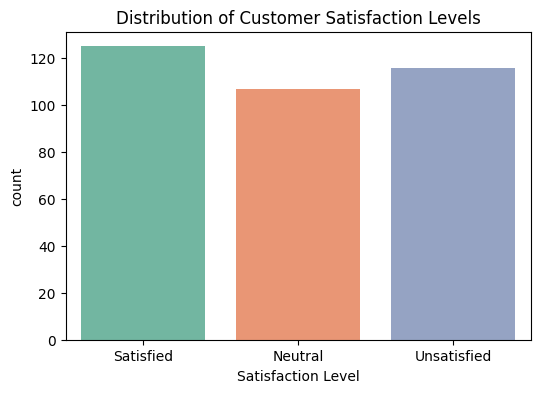

Satisfaction Level
Satisfied      0.359195
Unsatisfied    0.333333
Neutral        0.307471
Name: proportion, dtype: float64


In [41]:
#Understanding Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Satisfaction Level', palette='Set2')
plt.title("Distribution of Customer Satisfaction Levels")
plt.show()

print(df['Satisfaction Level'].value_counts(normalize=True))


PRE PROCESSING THE DATA

In [62]:

print(df.isnull().sum())

df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)



Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [63]:
# Define Features & Target
X = df.drop(columns=['Satisfaction Level', 'Customer ID'])  # Feature matrix without target and ID
y = df['Satisfaction Level']  # Target variable


In [64]:
# Identify categorical & numerical features
categorical_features = ['Gender', 'City', 'Membership Type', 'Discount Applied']
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Transform Data
X_processed = preprocessor.fit_transform(X)


In [65]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)


In [67]:
# One-Hot Encoding
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # Drop first to avoid dummy variable trap
X_encoded = encoder.fit_transform(df[categorical_features])

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))

# Concatenate with numerical features
numerical_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
X_numeric = df[numerical_features]

# Combine Encoded Categorical + Numerical Data
X_processed = pd.concat([X_numeric.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)


In [68]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


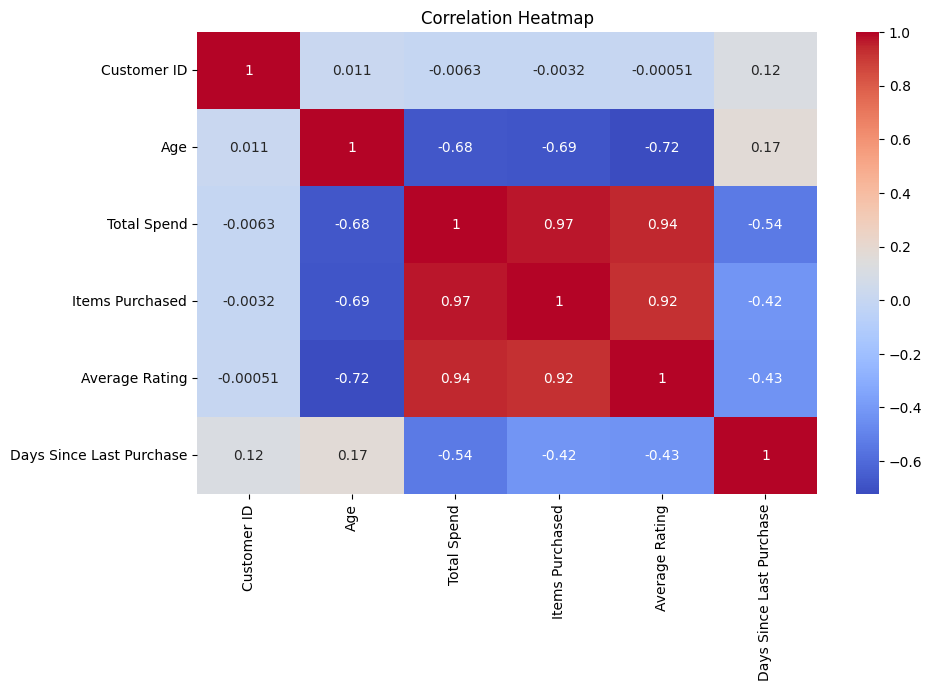

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**LOGISTIC REGRESSION**

In [70]:
# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.974025974025974
Confusion Matrix:
 [[26  0  0]
 [ 2 29  0]
 [ 0  0 20]]
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.93      1.00      0.96        26
   Satisfied       1.00      0.94      0.97        31
 Unsatisfied       1.00      1.00      1.00        20

    accuracy                           0.97        77
   macro avg       0.98      0.98      0.98        77
weighted avg       0.98      0.97      0.97        77



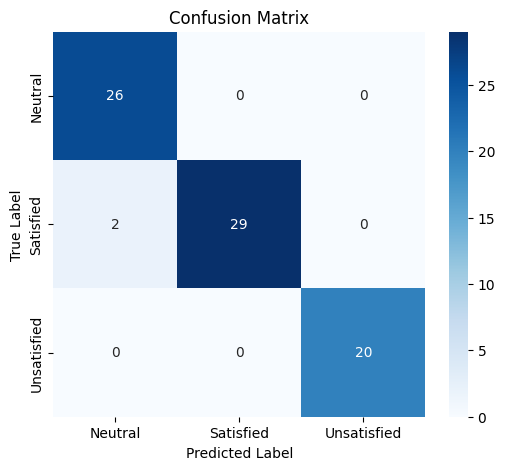

In [71]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Neutral", "Satisfied", "Unsatisfied"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


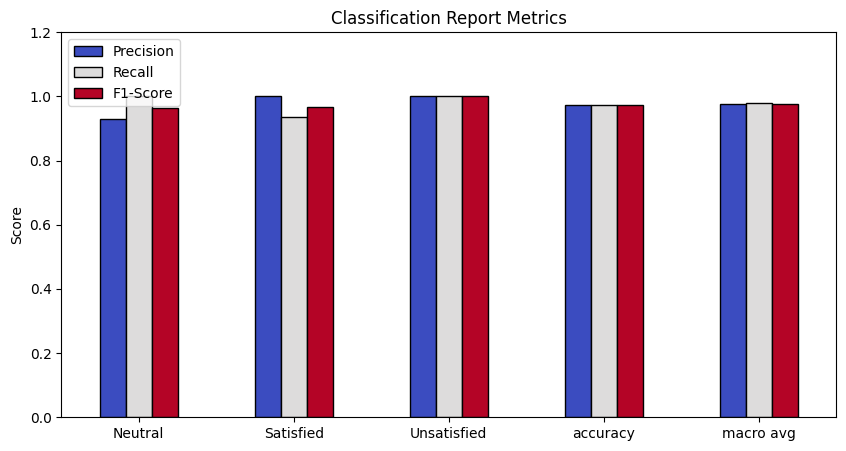

In [72]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame for plotting
report_df = pd.DataFrame(report).T.iloc[:-1, :3]

# Plot the bar chart
report_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.2)
plt.legend(["Precision", "Recall", "F1-Score"])
plt.show()


**RANDOM FOREST**

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
Confusion Matrix:
 [[26  0  0]
 [ 0 31  0]
 [ 0  0 20]]
Classification Report:
               precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        26
   Satisfied       1.00      1.00      1.00        31
 Unsatisfied       1.00      1.00      1.00        20

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



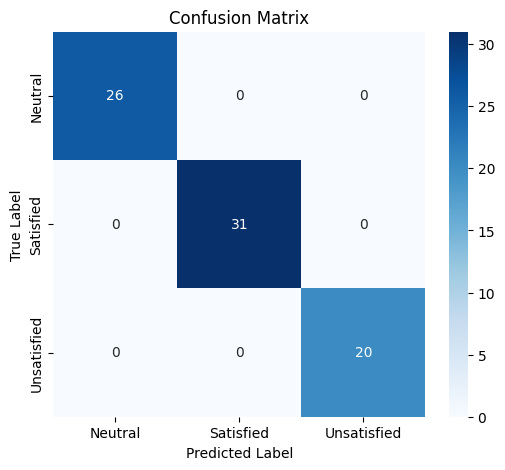

In [74]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
labels = ["Neutral", "Satisfied", "Unsatisfied"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


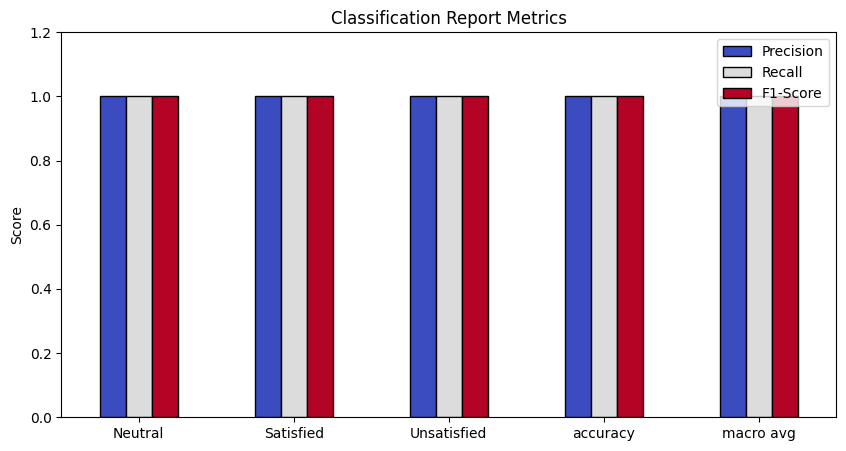

In [75]:
# classification report
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf are already defined
report = classification_report(y_test, y_pred_rf, output_dict=True)

report_df = pd.DataFrame(report).T.iloc[:-1, :3]

report_df.plot(kind="bar", figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.2)
plt.legend(["Precision", "Recall", "F1-Score"])
plt.show()


<ipython-input-76-9f264a296712>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")


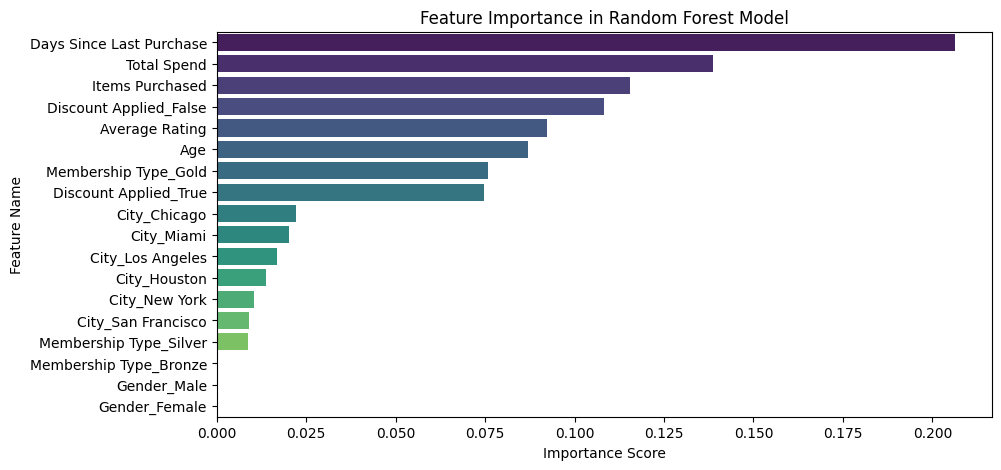

In [76]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rf_model and preprocessor are already defined
importances = rf_model.feature_importances_

num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(categorical_features)

features = np.concatenate([num_features, cat_features])

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


**SVM**

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation Metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.974025974025974
Confusion Matrix:
 [[26  0  0]
 [ 2 29  0]
 [ 0  0 20]]
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.93      1.00      0.96        26
   Satisfied       1.00      0.94      0.97        31
 Unsatisfied       1.00      1.00      1.00        20

    accuracy                           0.97        77
   macro avg       0.98      0.98      0.98        77
weighted avg       0.98      0.97      0.97        77



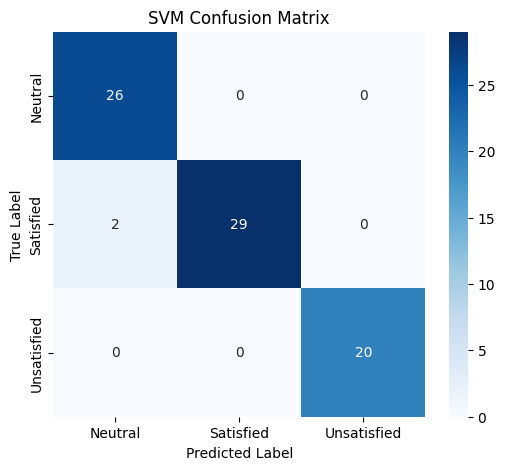

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
labels = ["Neutral", "Satisfied", "Unsatisfied"]

# Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix")
plt.show()


Accuracy comparison


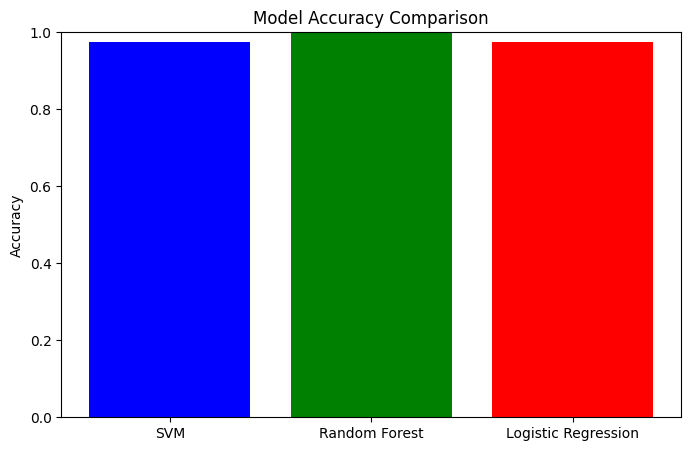

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assume that y_test and predictions (y_pred_svm, y_pred_rf, y_pred) are already defined

# 1. Accuracy Comparison Bar Plot
accuracies = [
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred)
]

models = ['SVM', 'Random Forest', 'Logistic Regression']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
